In [1]:

input_file = 'spectrum_cesium_new'
output_file = 'spectrum_cesium_new.csv'

with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
    for line in infile:
        values = line.strip().split()
        outfile.write(','.join(values) + '\n')



In [2]:
import pandas as pd

df = pd.read_csv('spectrum_cesium_new.csv', sep=',', header=None)
df = df.iloc[1:].reset_index(drop=True)
df = df.apply(pd.to_numeric, errors='coerce') #alle waarden numeriek zetten want fout meldingen drive me crazy


In [3]:

pulseheight_cesium = df.iloc[:, 0].values  
counts_cesium = df.iloc[:, 1].values      

print(pulseheight_cesium[:10])
print(counts_cesium[:10])


[ 89.55882353 118.67647059 147.79411765 176.91176471 206.02941176
 235.14705882 264.26470588 293.38235294 322.5        351.61764706]
[1277 1969 2381 2858 3052 3398 4305 5246 4544 3946]


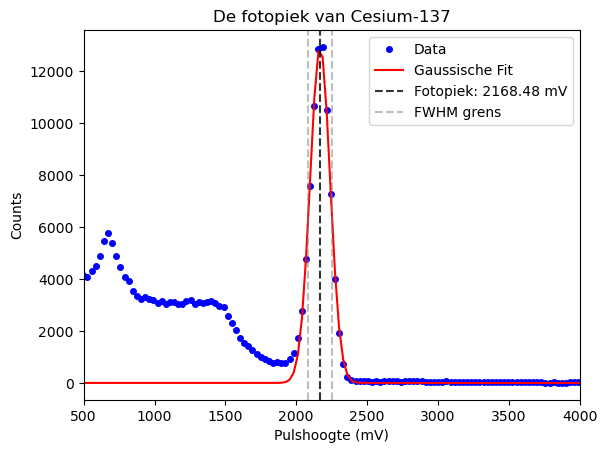

Fotopiek is dus 2168.48 mV met fout 6.23 mV
FWHM is 166.09 mV met fout 14.68 mV
Resolutie is dus 7.66% met fout 0.68%


In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


def gauss_function(x, amp, cen, width):  # Gaussische functie
    return amp * np.exp(-((x - cen) ** 2) / (2 * width ** 2))



initial_guess = [max(counts_cesium), pulseheight_cesium[np.argmax(counts_cesium)], 100]
params, covariance = curve_fit(gauss_function, pulseheight_cesium, counts_cesium, p0=initial_guess)

amp, midden, width = params

amp_error, midden_error, width_error = np.sqrt(np.diag(covariance)) #fout uit de fit

fwhm = 2 * np.sqrt(2 * np.log(2)) * width
fwhm_error = 2 * np.sqrt(2 * np.log(2)) * width_error
resolutie = (fwhm / midden) * 100


resolutie_error = resolutie * np.sqrt((fwhm_error / fwhm) ** 2 + (midden_error / midden) ** 2)

plt.xlim(500, 4000)
plt.plot(pulseheight_cesium, counts_cesium, label="Data", color="blue", marker="o",  markersize=4, linestyle="")
plt.plot(pulseheight_cesium, gauss_function(pulseheight_cesium, *params), label="Gaussische Fit", color="red", linestyle="-")
plt.axvline(midden, color='black', linestyle='--', label=f'Fotopiek: {midden:.2f} mV', alpha=0.8)
plt.axvline(midden - fwhm / 2, color='grey', linestyle='--', label='FWHM grens', alpha=0.5)
plt.axvline(midden + fwhm / 2, color='grey', linestyle='--', alpha=0.5)
plt.xlabel("Pulshoogte (mV)")
plt.ylabel("Counts")
plt.title("De fotopiek van Cesium-137")
plt.legend()
plt.show()

print(resolutie, resolutie_error)
